# Regression

## Setup (hidden)

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; margin-left:350px; }</style>"))
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
pd.set_option( 'display.notebook_repr_html', False)  # render Series and DataFrame as text, not HTML
pd.set_option( 'display.max_column', 10)    # number of columns
pd.set_option( 'display.max_rows', 10)     # number of rows
pd.set_option( 'display.width', 90)        # number of characters per row

## Linear Regression

### The Concept

Linear Regression establishes a relationship between **dependent variable (Y)** and one or more **independent variables (X)** using a best fit straight line (also known as **regression line**).  

- The objective of linear regression modeling is to find the most **optimum equation** that **best explain** the data
- **Optimum** equation is defined as the one that has the least cost (error)

Once we had derived the **optimum equation**, we can use the model to predict target $Y'$ base on new variables $X$. 

### Assumptions

Below are conditions for the **least-squares estimator - used by linear regression** to possess desirable properties; in particular, these assumptions imply that the **parameter estimates** will be **unbiased, consistent, and efficient** in the class of linear unbiased estimators. 

#### Classical Assumptions

- The sample is representative of the population for the inference prediction  
    Question how is the data being gathered, is it convincing that it represents the population  ?
    
- Number of observations **must be larger** than number of independent variables  
    Check the length of observations >= column length of data  
    
#### Assumptions On Dependent Variable

- Must not be a categorical data type  

#### Assumptions On Independent Variable

- The independent variables are measured with **no error**, that is observations must be a set of known constants. (Note: If this is not so, modeling may be done instead using errors-in-variables model techniques)  

- **Each** independent variable are **linearly correclated with outcome**, when other independent variables are held constant. **Matrix scatter plot and correlation calculation** can validate this. Generally correlation of 0.7 and above are considered good.  

- **NO Multicollinearity** amont predictors - Meaning little or not linear correlationamong the predictors, i.e. it is not possible to express any predictor as a linear combination of the others, if so, we wouldn't know which predictor actually influene the outcome. 

#### Assumptions On Errors (residuals)
  
- The **errors are random numbers**, with means of **zero**  
    - There should not be a pattern in the residuals distribution  
    - If the residuals are **normally distributed** with **mean of zero**, then it is considered a bonus which we can perform statistical significant testing. $e = N(0,\sigma^2)$  
    - Normality on redisuals implies that the dependent variable are also normally distributed (if and only if **dependent variable is not stochastic**)  
    
- The **errors are uncorrelated** - that is, the variance–covariance matrix of the errors is diagonal and each non-zero element is the variance of the error  

- **Homoscedasticity** - The variance of the error is constant across observations. If heteroscedasticity exist, scatter plot of response and predictor will look like below  ![Heteroscedasticity](./img/heteroscedastic.jpg)  
    - The Goldfeld-Quandt Test can test for heteroscedasticity  
    - If homoscedasticity is present, a non-linear correction might fix the problem  
    - Otherwise, weighted least squares or other methods might instead be used.

#### Are These Assumptions to be followed strictly ?

In real life, actual data **rarely satisfies** the assumptions, that is:  

- Method is used even though the assumptions are not true  
- Variation from the assumptions can sometimes be used as a measure of how far the model is from being useful  
- Many of these assumptions may be relaxed in more advanced treatments  

Reports of statistical analyses usually include analyses of tests on the sample data and methodology for the fit and usefulness of the model. 
    
#### Additional Notes On Independent variables  
  
- Adding more variables to a regression procedure may **overfit** the model and make things worse. The idea is to pick the **best** variables  
- Some independent variable(s) are better at predicting the outocme, some contribute little or nothing  

  Because of **multicollinearity** and **overfitting**, there is a fair amount of **prep-work** to be performed BEFORE conducting multiple regression analysis - if one is to do it properly.  

### Equations

#### Terminology

**Simple** Linear Regression (classical) consists of just on predictor.  aka Single Variable Linear Regression.  
**Multiple** Linear Regression (classical)    consists of multiple predictors.  aka. Multiple Variable Linear Regression.  

**Multivariate** Regression (aka. **General Linear Regression**) is linear regression where the outocme is a vector (not scalar).   Not the same as multiple variable linear regression.  

#### Ordinary Least Square Estimatation

**Regression Model - Actual Outcome**

$\quad y_i = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ...  \beta_k x_k + e_i$  
$\quad$where:  
$\quad \quad y_i$ = actual outcome value  
$\quad \quad \beta_0$ = intercept, when all independent variables are 0  
$\quad \quad \beta_k$ = parameter for independent variable k
$\quad \quad e_i$ = error for observation i  

**Regression Equation - Predicted Outcome**

$\quad E(y_i) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ...  \beta_k x_k$  

$\quad h_\theta(X)~=~\theta_0~+~\theta_1 \cdot X$  , error terms assumed to be zero  
$\quad$where:  
$\quad \quad h_\theta(x)$ = hypothesis target (dependant variable)  
$\quad \quad \theta_0$ = intercept  
$\quad \quad \theta_1$ = slopes or coefficients  
$\quad \quad X$ = independant variables (predictors)  

$\quad$Take note that each $\theta_0$ and $\theta_1$ represents multi-variate data in matrix form.  

#### Cost Function

- The goal is to find some values of θ (known as coefficients), so we can minimize the difference between real values $y$  and predicted values ($h(x)$)  
- Mathematically, this means finding the minimum value of cost function $J$ and derive the  optimum value of $\theta_0$ and $\theta_1$   
- Linear regression uses Total Sum Of Square calculation on Error as Cost Function, denoted by $J$ below:  

$\quad \quad J(\theta_0,\theta_1) = \frac{1}{2m}\sum_{i=1}^m ((h_\theta(x^i)-y^i)^2$

### OLS Performance

#### Fundamental

OLS performance is mainly on error analysis.  

**SST** (**total** sample variability) = **SSR** (**explained** variability) + **SSE** (**unexplained** variability) :    

![SST Explained](./img/explain_sst.jpg)

#### Root Mean Square Error (RMSE)

- RMSE = The square root of the average of the total sum of square error  
$RMSE = \sqrt{\frac{SSE}{n}} = \sqrt \frac{\sum^n_{i=1}{(y_i - \hat y_i)^2}}{n}$  
- It measure **how close** observed data points are to the model’s predicted values  
- It has a **unit of Y**, therefore **cannot used for comparison models with different outcome**  
- It can be used to compare different model with the similar outcome but different predictors, however, adjusted $R^2$ is better in this  
- Low RMSE value indicates better fit  
- Compared to the similar Mean Absolute Error, RMSE amplifies and severely punishes large errors  
- SSE is not usable for performance measurement becuase it increases with number of datapoints.  RMSE does not suffer this as it is divided by number of datapoints  
- **Residual Standard Errror (RSE)**  is very similar to **RMSE**, except that RSE use division by degree of freedom  

> **RMSE** is excellent general measurement to assess **the accuracy** of a model  

#### $r$, $R^2$ and $R^2_{adj}$

**r - Correlation Coeeficient**  

- Correlation, often measured as a correlation coefficient - indicates the **strength** and direction of a linear relationship between two variables (for example model output and observed values)  
- The best known is the Pearson product-moment correlation coefficient (also called Pearson correlation coefficient or the sample correlation coefficient)  
- It is a ratio (has no unit)  
$Pearson Correlation, r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}} \quad, \quad 0=<r<=1$  

> **Scatter plot** predicted and actual outcome reveal visually the good-fit of the model, good correlation also means tigther the scatter plots with less variability    

**R-Squared - Coefficient Determination**  

$R^2 = r^2 = \frac{SSR}{SST} = 1-\frac{SSE}{SST}, \quad 0 <= R^2 <= 1$  

- $R^2$ is a ratio (unit-less) indicating how much **variations are explained** by regression model  
- $R^2$ compares the fit model to a 'baseline' model (SST)  
- High $R^2$ value indicates high SSR and low SSE, which means the model is **more precise**  
    - **Perfect Case**  - no errors (SSE=0), $R^2$ will be 1.   
    - **Worst Case** - no improvement over baseline,  (coefficient=0, SSR=0, aka horizontally flat line), $R^2$ will be 0.  

- One pitfall of $R^2$ is that it **always increases** when additional variables are added to the model. The increase can be artificial as it doesn't improve the model fit - which is called **over-fitting**.  A **remediation** to this is $R^2_{adj}$  


**Adjusted R-Squared**  

- Adjusted $R^2$ incorporates the number of coefficients and observations into the calculation  
$R_{adj}^2 = 1- \bigg( \frac{n-1}{n-p}\bigg) \frac{SSE}{SST}$  
$\quad$ p = number of coefficients (including intercept)  
$\quad$ n = number of observations  

- Adjusted $R^2$ will **decrease** when adding predictors that doesn't increase the model fit that make up for the loss of degrees of freedom  
- Likewise, it will **increase** as predictors are added if the increase in model fit is **worthwhile**  

> **$R^2_{adj}$** is useful to **compare models with a different number of predictors**, hence good for feature selection  

**Training Data and Test Data (out of sample)**  

- A built model based on **training data** always has $R^2$ between 0 <= $R^2$ <= 1  
- However, if the model is **underfit**, **test data** may reveal $R^2$ <= 0  

### Feature Selection

1. The **strength and importance** of an independent variable **is not measured** by its correlation or coefficient with the dependent variable - It only hold true if there is only single independent variable    

2. **Multicolinearity** has below independent variable diversion and therefore must be removed:
  - It increases the p-value to make it insignificant 
  - It divert a coef direction (eg. positive becomes negative)  
  
3. Perform **transformation** (such as log, quadradric) if the plot of independet vs dependent variables shows Heteroscedasticity  

### Run The Code

#### Sample Data

In [3]:
n = 200  # number of samples
I = 250  # intercept value
E = np.random.randint( 1,20, n)  # Error
x1 = np.random.randint( 1,n+1, n)
x2 = np.random.randint( 1,n+1, n)
x3 = np.random.randint( 1,n+1, n)
x4 = x3 + np.random.randint(1,n+1,n)
Y = 0.1*x1 + 0.2*x2 + 0.3*x3 + E + I

**Put All Data In pandas DataFrame**

In [4]:
mydf = pd.DataFrame({
    'Y':Y,
    'x1':x1,
    'x2':x2,
    'x3':x3,
    'x4':x4
})
mydf.head()
X = mydf.filter(like='x')

#### Data Validation

##### Colleration Check
Ensure there is **no col-linearity** among the features used

**Correlation Text Output**

In [5]:
my_corr = X.corr()
my_corr

          x1        x2        x3        x4
x1  1.000000  0.089132 -0.003379 -0.030738
x2  0.089132  1.000000  0.054852  0.089682
x3 -0.003379  0.054852  1.000000  0.717366
x4 -0.030738  0.089682  0.717366  1.000000

**Correlation HTML Output**

In [6]:
my_corr.style.background_gradient().set_precision(2)

,x1,x2,x3,x4
x1,1,0.089,-0.0034,-0.031
x2,0.089,1,0.055,0.09
x3,-0.0034,0.055,1,0.72
x4,-0.031,0.09,0.72,1


**Correlation HTML Output without Annotation**

In [7]:
my_corr.style.background_gradient().set_properties(**{'font-size': '0pt'})

,x1,x2,x3,x4
x1,1,0.0891317,-0.00337879,-0.0307377
x2,0.0891317,1,0.0548518,0.0896824
x3,-0.00337879,0.0548518,1,0.717366
x4,-0.0307377,0.0896824,0.717366,1


##### Matrix Scatter Plot

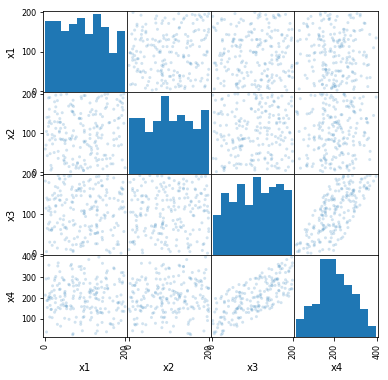

In [8]:
pd.plotting.scatter_matrix(X, alpha=0.2, figsize=(6, 6), diagonal='hist');

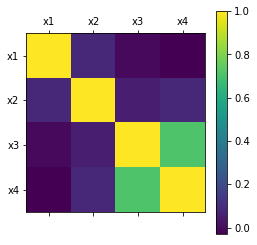

In [9]:
plt.matshow(X.corr())
plt.xticks(range(len(X.columns)), X.columns)
plt.yticks(range(len(X.columns)), X.columns)
plt.colorbar()
plt.show()

#### Data Preparation

##### Preparing Features and Dependent Value

In [10]:
feature_cols = ['x1','x2','x3']
X = mydf[feature_cols]
Y = mydf.Y 

##### Splitting Data Into Training and Test Sets

In [11]:
trainX,testX,trainY,testY = train_test_split(X,Y,test_size=0.2)

NameError: name 'train_test_split' is not defined

#### Create The Model

In [ ]:
lm = LinearRegression()   # create linear regression object
lm.fit( trainX, trainY )  # train the model using training set

#### Analyze The Model
##### Intercept

In [ ]:
lm.intercept_

##### Coef

In [ ]:
lm.coef_

In [ ]:
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['features','coef'] )

##### R-Squared

In [ ]:
trainPred = lm.predict( trainX )

In [ ]:
r2_score( trainY, trainPred )

#### Model Performance
##### Prediction on Train Data

In [ ]:
trainY_ = lm.predict( trainX )

**Mean Absolute Error (MAE)**

In [ ]:
mean_absolute_error( trainY, trainY_ )

**Mean Squared Error (MSE)**

In [ ]:
mean_squared_error( trainY, trainY_ )

**Root Mean Squared Error (RMSE)**

In [ ]:
math.sqrt( mean_squared_error( trainY, trainY_ ) )

##### Prediction on Test Data

In [ ]:
testY_ = lm.predict( testX )

In [ ]:
mean_absolute_error( testY, testY_ )

In [ ]:
mean_squared_error( testY, testY_ )

In [331]:
math.sqrt( mean_squared_error( testY, testY_ ) )

6.4844871580983785

## Modeling (statsmodel)

### Data Preparation
Splitting data into training set and testing set.

In [332]:
traindf, testdf = train_test_split(mydf, test_size=0.2)
trainX,testX,trainY,testY = train_test_split(X,Y,test_size=0.2)

### Create The Model - Equation Method
This method assume all data (dependend and independent variables) are in **single dataframe**

In [335]:
fit = smf.ols(formula='Y ~ x1 + x2 + x3', data=traindf).fit()

#### Analyze The Model

In [336]:
print (fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     936.2
Date:                Fri, 15 Jun 2018   Prob (F-statistic):           1.74e-99
Time:                        10:32:45   Log-Likelihood:                -492.05
No. Observations:                 160   AIC:                             992.1
Df Residuals:                     156   BIC:                             1004.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    260.2819      1.375    189.257      0.0

### Create The Model - Array Method
This method assume independent and dependent variables are in seperate dataframe  
**intercept** is not included in OLS modeling by default. Hence need to use **add_constant()** to training dataset in order to display intercept estimate.

In [337]:
trainX = sm.add_constant(trainX)     # this add new column of all value 1
fit2 = smf.OLS(trainY, trainX).fit()

#### Analyze The Model

In [338]:
print (fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     862.1
Date:                Fri, 15 Jun 2018   Prob (F-statistic):           7.58e-97
Time:                        10:32:45   Log-Likelihood:                -493.22
No. Observations:                 160   AIC:                             994.4
Df Residuals:                     156   BIC:                             1007.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        259.8796      1.386    187.517      0.0

## Examples

### Example 1 - Linear Regression

#### Sample Data
Plot looks like polynomial.

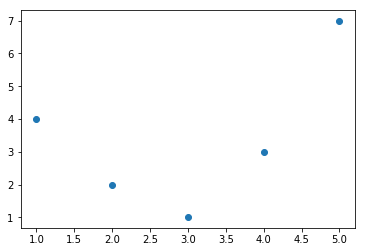

In [340]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

#### Built The Model

**Prepare The Data**  
X needs to be at least 2D. Increase the dimension with newaxis

In [341]:
X = x[:, np.newaxis]
X

array([[1],
       [2],
       [3],
       [4],
       [5]])

**Fit and Predict**

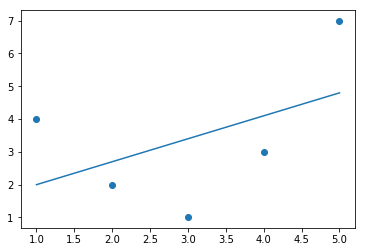

In [342]:
fit = LinearRegression().fit(X, y)
pred = fit.predict(X)
plt.scatter(x, y)
plt.plot(x,pred)

### Example 2 - Linear Regression with Polynomial Basic Functions

#### Sample Data

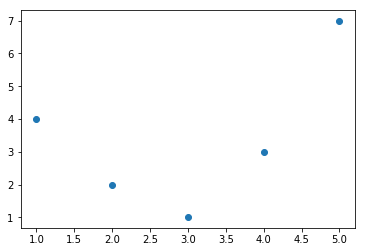

In [343]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

#### Clean Method - Use Pipeline
This method **avoid manually** creating engineered features.

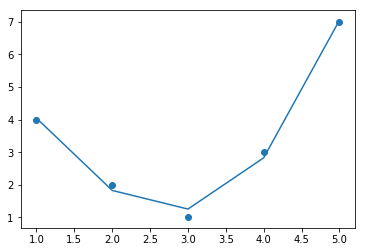

In [344]:
poly_model = make_pipeline( PolynomialFeatures(3), LinearRegression())
poly_model.fit( X,y)
pred2 = poly_model.predict(X)
## plot
plt.scatter(x, y)
plt.plot(x,pred2)

#### Alternative Method - Use Transform
This method involve create a PolynomialFeatures object, transform original data (X) with more engineered features according to degree chosen.

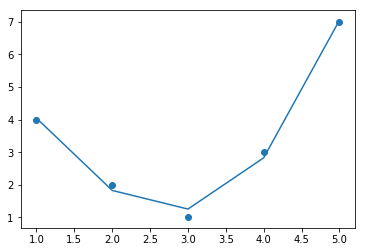

In [345]:
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
fit2 = LinearRegression().fit(X2, y)
pred2 = fit2.predict(X2)
## plot
plt.scatter(x, y)
plt.plot(x,pred2)

## Logistic Regression

## Feature Selection

The advantage of using skcikit-learn package is that it has this particular method selection, works more or less like backward selection (not exactly), and is called **Recursive Feature**. How it works:

- Model run with all variables, weight is assigned to each variable
- Variable with smallest weight will be pruned from next iteration
- Run the model again till the number of desired features is left

### The Library

In [346]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [347]:
estimator = SVR(kernel='linear')       # we are using linear model
selector = RFE (estimator, 2, step=1)  # we want just 2 features
selector = selector.fit(X,Y)           # execute

ValueError: Found input variables with inconsistent numbers of samples: [5, 200]

In [ ]:
selector.support_

In [ ]:
selector.ranking_

In [ ]:
selector.estimator_